We imported our xlsx file and created a list and we identified the missing values by using the .info() and .isnull().any() Info: to check the information like the type and number of columns we had on the dataset isnull: at first 3 feature was true.

In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './birthweight_low.xlsx'

# reading the file into Python
birthweight_ds = pd.read_excel(file)
# code will not produce an output
birthweight_ds.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
#checking datasets information
birthweight_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [3]:
# Checking the NaN
birthweight_ds.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [4]:
#count total null value 
for col in birthweight_ds:
    if(birthweight_ds[col].isnull().any().sum()>0):
        print(col + " " + str(birthweight_ds[col].isnull().sum()))

meduc 3
npvis 3
feduc 7


In [5]:
# Flagging the Missing values
for col in birthweight_ds:
            
    if birthweight_ds[col] .isnull() .astype(int) .sum()  > 0:
        birthweight_ds['m_' + col] = birthweight_ds[col].isnull().astype(int)

        
        
### Total Missing values per Observation
birthweight_ds['mv_sum'] = birthweight_ds['m_meduc'] + birthweight_ds['m_npvis'] + birthweight_ds['m_feduc'] 


#### checking results
print(f"""

Number of Missing Values per Observation (Pct)
----------------------------------------------
{(birthweight_ds['mv_sum'].value_counts(normalize = True,
                              sort      = True,
                              ascending = True)*100).round(2)}\n""")




Number of Missing Values per Observation (Pct)
----------------------------------------------
2     1.53
1     3.57
0    94.90
Name: mv_sum, dtype: float64



In [6]:
# Checking the NaN
birthweight_ds.isnull().any()

mage       False
meduc       True
monpre     False
npvis       True
fage       False
feduc       True
omaps      False
fmaps      False
cigs       False
drink      False
male       False
mwhte      False
mblck      False
moth       False
fwhte      False
fblck      False
foth       False
bwght      False
m_meduc    False
m_npvis    False
m_feduc    False
mv_sum     False
dtype: bool

Finding mean , mode  and median to compare  best fit value in place NA. according data better replace NA to median value.

In [7]:
#print mean , mode and median
print(f"""1. npvis mean: - {birthweight_ds["npvis"].mean()} |median: - {birthweight_ds["npvis"].median()} mode:- {birthweight_ds["feduc"].mode().values[0]}""")
print(f"""2. meduc mean: - {birthweight_ds["meduc"].mean()} |median: - {birthweight_ds["meduc"].median()} mode:- {birthweight_ds["meduc"].mode().values[0]}""")
print(f"""3. feduc mean: - {birthweight_ds["feduc"].mean()} |median: - {birthweight_ds["feduc"].median()} mode:- {birthweight_ds["feduc"].mode().values[0]}""")

1. npvis mean: - 11.601036269430052 |median: - 12.0 mode:- 12.0
2. meduc mean: - 13.911917098445596 |median: - 14.0 mode:- 12.0
3. feduc mean: - 13.846560846560847 |median: - 14.0 mode:- 12.0


In [8]:
# mean and median round value is same all missing so i decide to take median becuase it do not effect more if take any one 
#meduc        True categorical data
#npvis        True Continious
#feduc        True categorical data

# fill NA with mode
birthweight_ds["meduc"].fillna(value=  birthweight_ds["meduc"].median(),inplace = True) #replacing the Na
birthweight_ds["feduc"].fillna(value = birthweight_ds["feduc"].median() , inplace = True)#value for filling the NA
birthweight_ds["npvis"].fillna(value = birthweight_ds["npvis"].median(), inplace = True)#value for filling the NA


In [9]:
# Checking the NaN
birthweight_ds.isnull().any()

mage       False
meduc      False
monpre     False
npvis      False
fage       False
feduc      False
omaps      False
fmaps      False
cigs       False
drink      False
male       False
mwhte      False
mblck      False
moth       False
fwhte      False
fblck      False
foth       False
bwght      False
m_meduc    False
m_npvis    False
m_feduc    False
mv_sum     False
dtype: bool

In [10]:
# Changing the type of columns
birthweight_ds['meduc'] = birthweight_ds['meduc'].astype(float).astype(np.int64)
birthweight_ds['feduc'] = birthweight_ds['feduc'].astype(float).astype(np.int64)
birthweight_ds['npvis'] = birthweight_ds['npvis'].astype(float).astype(np.int64)

In [11]:
# Frequency of the Treated Dataset (col) in actual numbers
for col in birthweight_ds:
    fr_col = birthweight_ds[col].value_counts(normalize = False,
                                  sort      = True,
                                  ascending = False).round(decimals = 2)
    print(f"""Frequency of the {col}:\n{fr_col}\n""")

Frequency of the mage:
42    14
33    12
38    12
29    10
40     9
34     9
32     8
41     8
30     8
48     7
37     7
39     7
47     6
31     6
44     5
43     5
36     5
35     5
51     4
28     4
49     4
50     4
61     3
24     3
52     2
46     2
26     2
64     2
25     2
27     2
23     2
53     2
58     2
71     2
68     1
57     1
62     1
70     1
60     1
56     1
54     1
67     1
45     1
59     1
69     1
Name: mage, dtype: int64

Frequency of the meduc:
12    56
16    51
14    31
17    18
13    15
11    11
15     9
10     4
8      1
Name: meduc, dtype: int64

Frequency of the monpre:
2    93
1    45
3    33
4    13
5     4
7     3
8     3
6     2
Name: monpre, dtype: int64

Frequency of the npvis:
12    68
10    24
8     15
11    15
9     12
15     9
13     9
6      7
7      7
14     7
16     5
5      3
20     3
17     2
3      2
30     2
19     1
2      1
35     1
31     1
25     1
18     1
Name: npvis, dtype: int64

Frequency of the fage:
39    20
36    17
38    1

Creating histplot for all feature to birthweight . we can better understand data distribution through below histplot

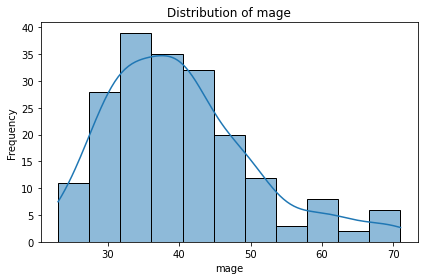

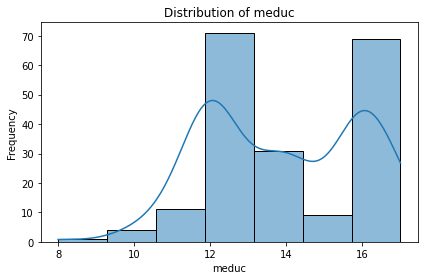

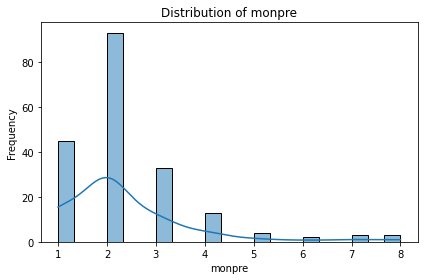

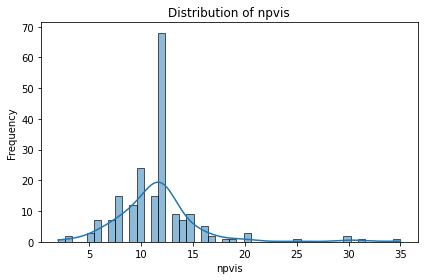

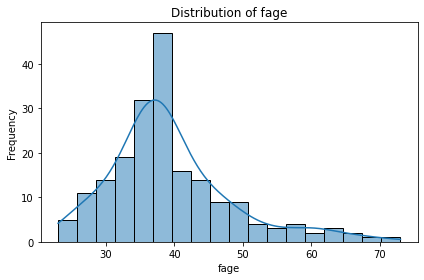

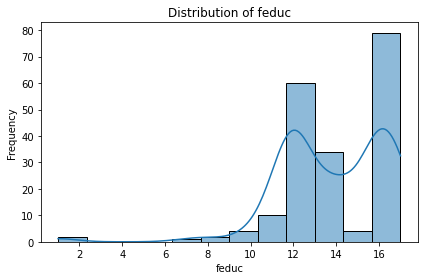

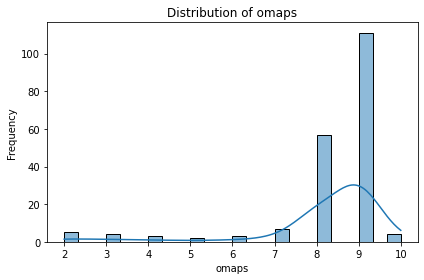

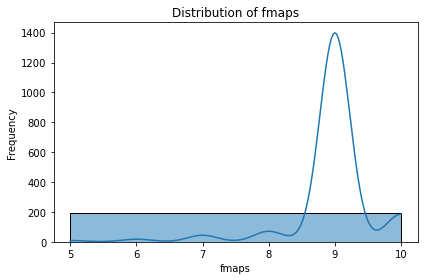

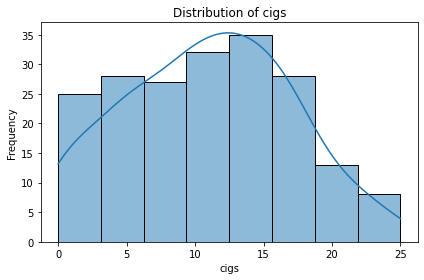

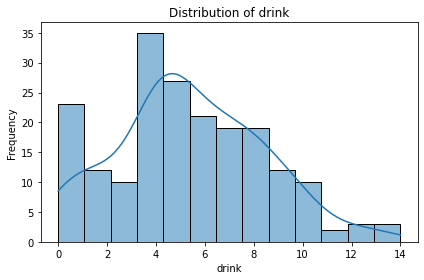

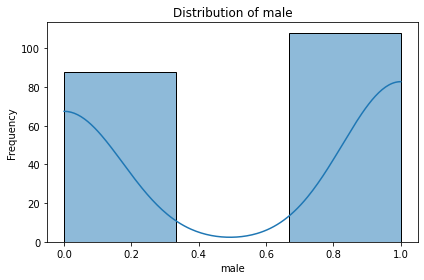

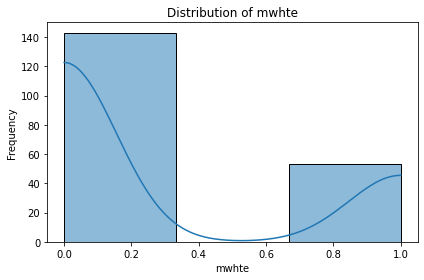

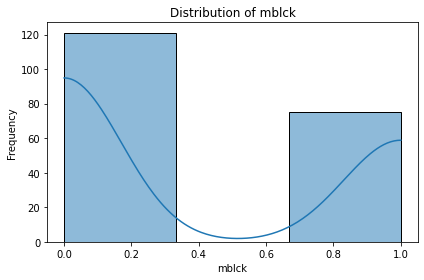

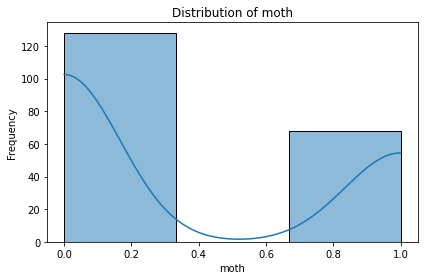

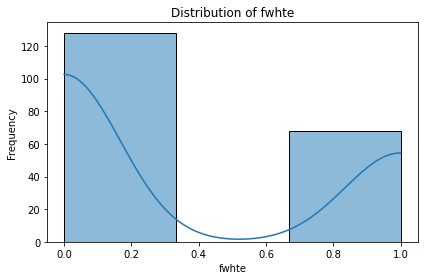

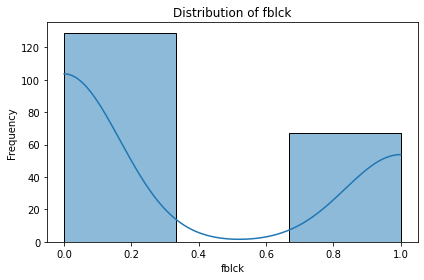

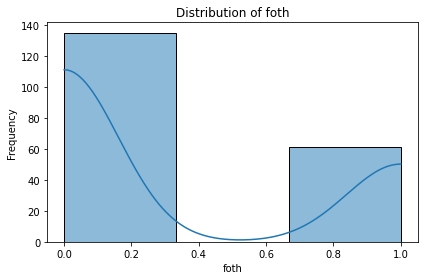

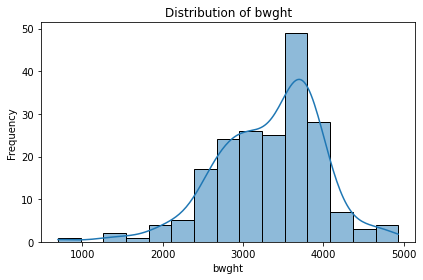

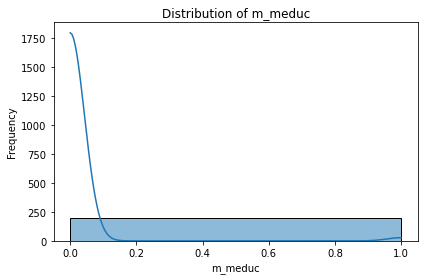

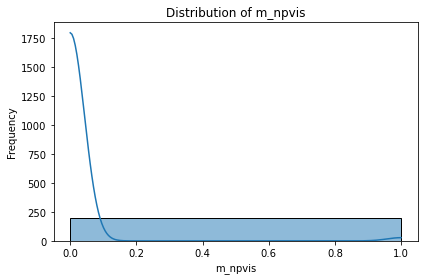

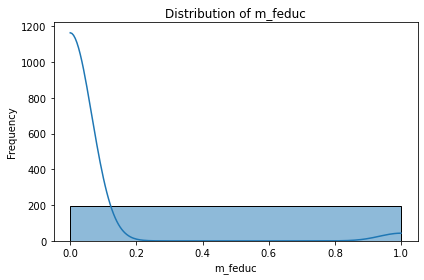

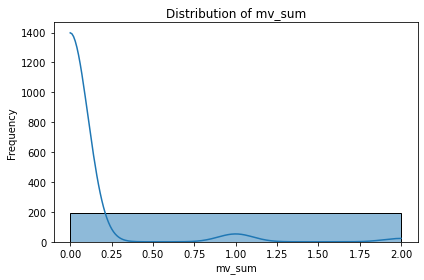

In [12]:
#create histplot for all
for col in birthweight_ds:
    sns.histplot(data = birthweight_ds,
                 x = col,
                 kde = True,
                 bins = 'fd')
    plt.title(label = f"Distribution of {col}")
    plt.xlabel(xlabel = f"{col}")
    plt.ylabel(ylabel = "Frequency")
    
    plt.tight_layout()
    plt.show()

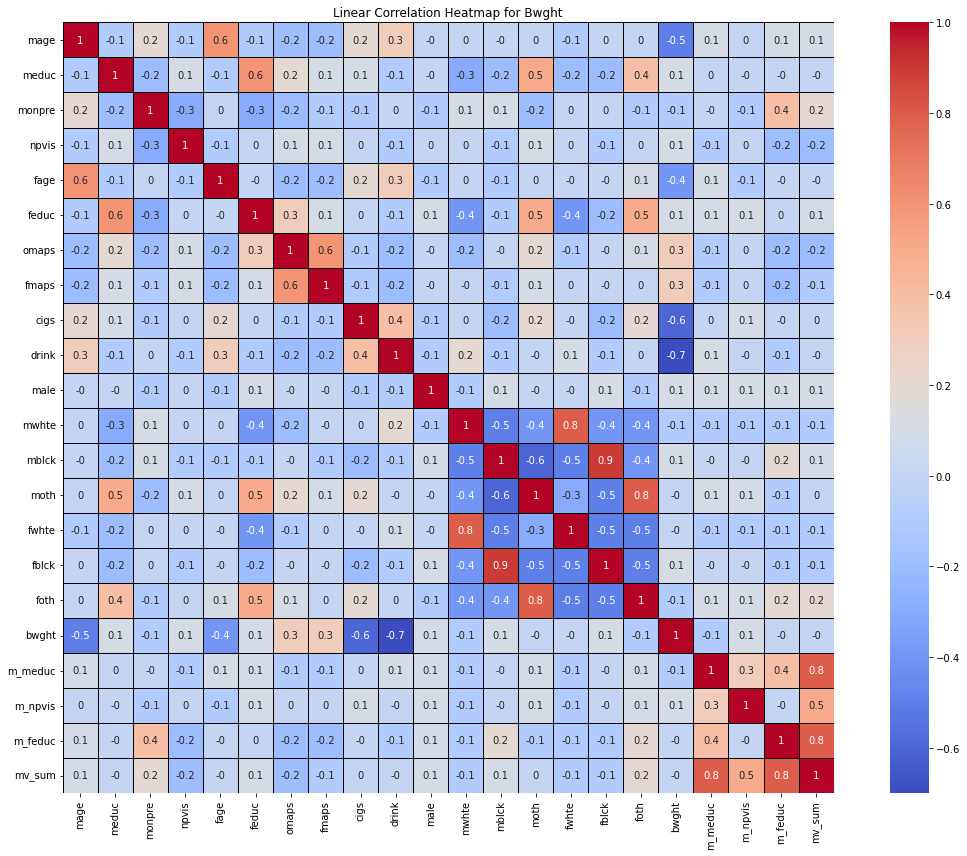

In [13]:
# Creating a Linear Correlation Heatmap for Dataset
fig, ax = plt.subplots(figsize = (16,12))

birthweight_ds_corr = birthweight_ds.corr(method = 'pearson').round(decimals = 1)

sns.heatmap(data = birthweight_ds_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.title(label = "Linear Correlation Heatmap for Bwght")

plt.tight_layout()
plt.show()

In [14]:
# Linear Correlation for birthweight
birthweight_ds_corr = birthweight_ds.corr(method = 'pearson').round(decimals = 1)
birthweight_ds_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = True , )

drink     -0.7
cigs      -0.6
mage      -0.5
fage      -0.4
m_meduc   -0.1
monpre    -0.1
foth      -0.1
mwhte     -0.1
fwhte     -0.0
moth      -0.0
mv_sum    -0.0
m_feduc   -0.0
mblck      0.1
feduc      0.1
fblck      0.1
npvis      0.1
meduc      0.1
m_npvis    0.1
male       0.1
fmaps      0.3
omaps      0.3
bwght      1.0
Name: bwght, dtype: float64

In [15]:
#generate col+ for reg
for col in birthweight_ds:
    print(col + " +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
m_meduc +
m_npvis +
m_feduc +
mv_sum +


In [16]:
#first try to for all feature
# importing an additional package
import statsmodels.formula.api as smf # predictive modeling with nice outputs
# Step 1: INSTANTIATE a model object
# Linear Regression
linear_regression = smf.ols(formula =  """bwght ~ 
mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth+
m_meduc +
m_npvis +
m_feduc 
    """,
                  data = birthweight_ds)


# Step 2: FIT the data into the model object
results = linear_regression.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     29.65
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.41e-42
Time:                        20:16:03   Log-Likelihood:                -1419.2
No. Observations:                 196   AIC:                             2872.
Df Residuals:                     179   BIC:                             2928.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2689.3195    177.380     15.161      0.0

According above two analysis i remove one by one less significant and higher p-value feature .
Corr of below to bwght
foth     -0.1
mwhte    -0.1
monpre   -0.1
moth     -0.0
fwhte    -0.0
npvis     0.1
feduc     0.1
meduc     0.1
male      0.1
mblck     0.1

#p-value is higher than 5%
meduc         17.1716     16.819      1.021      0.309     -16.016      50.359
monpre         1.3549     22.486      0.060      0.952     -43.015      45.725
npvis          1.9657      6.566      0.299      0.765     -10.991      14.922
fage          -4.7410      3.567     -1.329      0.186     -11.780       2.298
feduc         12.6419     14.802      0.854      0.394     -16.566      41.850
omaps         -5.7162     22.672     -0.252      0.801     -50.453      39.021
fmaps         78.9068     52.282      1.509      0.133     -24.258     182.072
male          18.7015     52.824      0.354      0.724     -85.532     122.935



In [17]:
# importing an additional package
import statsmodels.formula.api as smf # predictive modeling with nice outputs
# Step 1: INSTANTIATE a model object
# Linear Regression
linear_regression = smf.ols(formula =  """bwght ~ 
mage +
cigs +
drink +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth
    """,
                  data = birthweight_ds)


# Step 2: FIT the data into the model object
results = linear_regression.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     64.57
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.12e-46
Time:                        20:16:03   Log-Likelihood:                -1426.0
No. Observations:                 196   AIC:                             2868.
Df Residuals:                     188   BIC:                             2894.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2970.7332     66.826     44.455      0.0

Above model got r^2 =70% and all p value below 5% but need more analysis for better model. 



In [18]:
# log transforming mage and saving it to the dataset
birthweight_ds['log_bwght'] = np.log(birthweight_ds['bwght'])
birthweight_ds['log_mage'] = np.log(birthweight_ds['mage'])
birthweight_ds['log_meduc'] = np.log(birthweight_ds['meduc'])
birthweight_ds['log_feduc'] = np.log(birthweight_ds['feduc'])
birthweight_ds['log_npvis'] = np.log(birthweight_ds['npvis'])
birthweight_ds['log_feduc'] = np.log(birthweight_ds['feduc'])
birthweight_ds['log_monpre']   = np.log(birthweight_ds['monpre'])
#sum +0.0009 because there are variable 0
birthweight_ds['log_cigs']   = np.log(birthweight_ds['cigs'] + 0.00009)
birthweight_ds['log_drink']   = np.log(birthweight_ds['drink'] + 0.00009)
birthweight_ds['fage_mage']   = birthweight_ds['fage']*birthweight_ds['mage']
birthweight_ds['ln_feduc_meduc']   = np.log(birthweight_ds['feduc'])*np.log(birthweight_ds['meduc'])



In [19]:
#check row data
birthweight_ds.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,mv_sum,log_bwght,log_mage,log_meduc,log_feduc,log_npvis,log_monpre,log_cigs,log_drink,fage_mage,ln_feduc_meduc
0,69,14,5,2,62,14,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1,2,6.546785,4.234107,2.639057,2.639057,0.693147,1.609438,3.135498,2.197235,4278,6.964624
1,68,12,3,10,61,11,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0,0,7.162397,4.219508,2.484907,2.397895,2.302585,1.098612,3.218879,2.397903,4148,5.958546
2,71,12,3,6,46,12,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0,0,7.306531,4.262680,2.484907,2.484907,1.791759,1.098612,3.044527,2.484914,3266,6.174761
3,59,16,1,8,48,16,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0,0,7.450080,4.077537,2.772589,2.772589,2.079442,0.000000,3.044527,2.302594,2832,7.687248
4,48,12,4,6,39,12,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0,0,7.578657,3.871201,2.484907,2.484907,1.791759,1.386294,2.833219,2.564956,1872,6.174761


In [20]:
# if take only below 4 value then result getting 71% R^2 due those fields more corr 
import statsmodels.formula.api as smf # predictive modeling with nice outputs
# Step 1: INSTANTIATE a model object
# Linear Regression
linear_regression = smf.ols(formula =  """bwght ~ 
cigs +
drink +
ln_feduc_meduc+
fage_mage
    """,
                  data = birthweight_ds)


# Step 2: FIT the data into the model object
results = linear_regression.fit()
print(results.summary())





                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     122.0
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.75e-51
Time:                        20:16:03   Log-Likelihood:                -1421.8
No. Observations:                 196   AIC:                             2854.
Df Residuals:                     191   BIC:                             2870.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4320.8194    187.278     23.

In [21]:
# if take only below 4 value then result getting 71% R^2 due those fields more corr 
import statsmodels.formula.api as smf # predictive modeling with nice outputs
# Step 1: INSTANTIATE a model object
# Linear Regression
linear_regression = smf.ols(formula =  """bwght ~ 
mage+
cigs +
drink +
log_mage+
log_meduc+
fage
    """,
                  data = birthweight_ds)


# Step 2: FIT the data into the model object
results = linear_regression.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     84.56
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           7.39e-51
Time:                        20:16:03   Log-Likelihood:                -1418.3
No. Observations:                 196   AIC:                             2851.
Df Residuals:                     189   BIC:                             2874.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1764.4283   1859.842     -0.949      0.3

I try many combination log on features but still R^2 is 71% so i am going to test with bins and other combination 

In [22]:
# creating categories for non categorical variables 

birthweight_ds_bin = birthweight_ds.copy()

# variable mage
birthweight_ds_bin['mage_bins'] = 0

# for loop with iterrows()
for index, col in birthweight_ds_bin.iterrows():
    
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if birthweight_ds_bin.loc[index, 'mage'] < 26:
        birthweight_ds_bin.loc[index, 'mage_bins'] = 'less26'
        
        
    elif birthweight_ds_bin.loc[index, 'mage'] < 29:
        birthweight_ds_bin.loc[index, 'mage_bins'] = '26to28'
        
        
    elif birthweight_ds_bin.loc[index, 'mage'] < 32:
        birthweight_ds_bin.loc[index, 'mage_bins'] = '29to32'
        
        
    else :
        birthweight_ds_bin.loc[index, 'mage_bins'] = 'over32'
        
# variable meduc_bins
birthweight_ds_bin['meduc_bins'] = 0

# for loop with iterrows()
for index, col in birthweight_ds_bin.iterrows():
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if birthweight_ds_bin.loc[index, 'meduc'] < 12:
        birthweight_ds_bin.loc[index, 'meduc_bins'] = 'less12'
        
        
    elif birthweight_ds_bin.loc[index, 'meduc'] < 13:
        birthweight_ds_bin.loc[index, 'meduc_bins'] = '12'
        
        
    elif birthweight_ds_bin.loc[index, 'meduc'] < 16:
        birthweight_ds_bin.loc[index, 'meduc_bins'] = '13to15'

    else :
        birthweight_ds_bin.loc[index, 'meduc_bins'] = 'over15'    
    
# variable monpre_bins
birthweight_ds_bin['monpre_bins'] = 0

# for loop with iterrows()
for index, col in birthweight_ds_bin.iterrows():
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if birthweight_ds_bin.loc[index, 'monpre'] < 2:
        birthweight_ds_bin.loc[index, 'monpre_bins'] = '0to1'
        
        
    elif birthweight_ds_bin.loc[index, 'monpre'] < 3:
        birthweight_ds_bin.loc[index, 'monpre_bins'] = '2'

    else :
        birthweight_ds_bin.loc[index, 'monpre_bins'] = 'over2'
    
# variable npvis_bins
birthweight_ds_bin['npvis_bins'] = 0

# for loop with iterrows()
for index, col in birthweight_ds_bin.iterrows():
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if birthweight_ds_bin.loc[index, 'npvis'] < 10:
        birthweight_ds_bin.loc[index, 'npvis_bins'] = 'less10'
        
    elif birthweight_ds_bin.loc[index, 'npvis'] < 12:
        birthweight_ds_bin.loc[index, 'npvis_bins'] = '10to11'
    elif birthweight_ds_bin.loc[index, 'npvis'] < 13:
        birthweight_ds_bin.loc[index, 'npvis_bins'] = '12'

    else :
        birthweight_ds_bin.loc[index, 'npvis_bins'] = 'over12'
    
# variable fage_bins
birthweight_ds_bin['fage_bins'] = 0

# for loop with iterrows()
for index, col in birthweight_ds_bin.iterrows():
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if birthweight_ds_bin.loc[index, 'fage'] < 28:
        birthweight_ds_bin.loc[index, 'fage_bins'] = 'less28'
    elif birthweight_ds_bin.loc[index, 'fage'] < 31:
        birthweight_ds_bin.loc[index, 'fage_bins'] = '28to30'
    elif birthweight_ds_bin.loc[index, 'fage'] < 35:
        birthweight_ds_bin.loc[index, 'fage_bins'] = '31to34'
    else :
        birthweight_ds_bin.loc[index, 'fage_bins'] = 'over34'

# variable feduc_bins
birthweight_ds_bin['feduc_bins'] = 0       
 # for loop with iterrows()
for index, col in birthweight_ds_bin.iterrows():
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if birthweight_ds_bin.loc[index, 'feduc'] < 12:
        birthweight_ds_bin.loc[index, 'feduc_bins'] = 'less12'
    elif birthweight_ds_bin.loc[index, 'feduc'] < 14:
        birthweight_ds_bin.loc[index, 'feduc_bins'] = '12to13'
    elif birthweight_ds_bin.loc[index, 'feduc'] < 16:
        birthweight_ds_bin.loc[index, 'feduc_bins'] = '14to15'
    else :
        birthweight_ds_bin.loc[index, 'feduc_bins'] = 'over15'   

# variable cigs_bins
birthweight_ds_bin['cigs_bins'] = 0       
 # for loop with iterrows()
for index, col in birthweight_ds_bin.iterrows():
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if birthweight_ds_bin.loc[index, 'cigs'] ==0:
        birthweight_ds_bin.loc[index, 'cigs_bins'] = '0'
    else :
        birthweight_ds_bin.loc[index, 'cigs_bins'] = '1'
    
# variable drink_bins
birthweight_ds_bin['drink_bins'] = 0       
# for loop with iterrows()
for index, col in birthweight_ds_bin.iterrows():
    
    # conditionals to change the values in the new column, defined by looking at descriptive statistics
    if birthweight_ds_bin.loc[index, 'drink'] ==0:
        birthweight_ds_bin.loc[index, 'drink_bins'] = '0'
    else :
        birthweight_ds_bin.loc[index, 'drink_bins'] = '1'


    
birthweight_ds_bin.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,mv_sum,log_bwght,log_mage,log_meduc,log_feduc,log_npvis,log_monpre,log_cigs,log_drink,fage_mage,ln_feduc_meduc,mage_bins,meduc_bins,monpre_bins,npvis_bins,fage_bins,feduc_bins,cigs_bins,drink_bins
0,69,14,5,2,62,14,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1,2,6.546785,4.234107,2.639057,2.639057,0.693147,1.609438,3.135498,2.197235,4278,6.964624,over32,13to15,over2,less10,over34,14to15,1,1
1,68,12,3,10,61,11,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0,0,7.162397,4.219508,2.484907,2.397895,2.302585,1.098612,3.218879,2.397903,4148,5.958546,over32,12,over2,10to11,over34,less12,1,1
2,71,12,3,6,46,12,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0,0,7.306531,4.262680,2.484907,2.484907,1.791759,1.098612,3.044527,2.484914,3266,6.174761,over32,12,over2,less10,over34,12to13,1,1
3,59,16,1,8,48,16,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0,0,7.450080,4.077537,2.772589,2.772589,2.079442,0.000000,3.044527,2.302594,2832,7.687248,over32,over15,0to1,less10,over34,over15,1,1
4,48,12,4,6,39,12,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0,0,7.578657,3.871201,2.484907,2.484907,1.791759,1.386294,2.833219,2.564956,1872,6.174761,over32,12,over2,less10,over34,12to13,1,1
5,67,11,4,8,40,8,4,9,16,14,0,1,0,0,1,0,0,1984,0,0,0,0,7.592870,4.204693,2.397895,2.079442,2.079442,1.386294,2.772594,2.639064,2680,4.986283,over32,less12,over2,less10,over34,less12,1,1
6,54,12,2,12,46,12,9,9,17,12,1,0,1,0,0,1,0,2050,0,0,0,0,7.625595,3.988984,2.484907,2.484907,2.484907,0.693147,2.833219,2.484914,2484,6.174761,over32,12,2,12,over34,12to13,1,1
7,71,14,4,7,51,11,9,8,15,13,0,1,0,0,1,0,0,2068,0,0,0,0,7.634337,4.262680,2.639057,2.397895,1.945910,1.386294,2.708056,2.564956,3621,6.328183,over32,13to15,over2,less10,over34,less12,1,1
8,56,12,1,9,53,14,8,9,14,9,1,1,0,0,1,0,0,2148,0,0,0,0,7.672292,4.025352,2.484907,2.639057,2.197225,0.000000,2.639064,2.197235,2968,6.557811,over32,12,0to1,less10,over34,14to15,1,1
9,58,12,2,12,61,16,9,9,13,6,0,0,1,0,0,1,0,2180,0,0,0,0,7.687080,4.060443,2.484907,2.772589,2.484907,0.693147,2.564956,1.791774,3538,6.889624,over32,12,2,12,over34,over15,1,1


In [23]:
#get 10 row details
birthweight_ds_bin.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_meduc,m_npvis,m_feduc,mv_sum,log_bwght,log_mage,log_meduc,log_feduc,log_npvis,log_monpre,log_cigs,log_drink,fage_mage,ln_feduc_meduc,mage_bins,meduc_bins,monpre_bins,npvis_bins,fage_bins,feduc_bins,cigs_bins,drink_bins
0,69,14,5,2,62,14,4,7,23,9,1,0,1,0,0,1,0,697,1,0,1,2,6.546785,4.234107,2.639057,2.639057,0.693147,1.609438,3.135498,2.197235,4278,6.964624,over32,13to15,over2,less10,over34,14to15,1,1
1,68,12,3,10,61,11,4,6,25,11,1,1,0,0,1,0,0,1290,0,0,0,0,7.162397,4.219508,2.484907,2.397895,2.302585,1.098612,3.218879,2.397903,4148,5.958546,over32,12,over2,10to11,over34,less12,1,1
2,71,12,3,6,46,12,2,7,21,12,1,0,1,0,0,1,0,1490,0,0,0,0,7.306531,4.262680,2.484907,2.484907,1.791759,1.098612,3.044527,2.484914,3266,6.174761,over32,12,over2,less10,over34,12to13,1,1
3,59,16,1,8,48,16,7,8,21,10,0,0,0,1,0,0,1,1720,0,0,0,0,7.450080,4.077537,2.772589,2.772589,2.079442,0.000000,3.044527,2.302594,2832,7.687248,over32,over15,0to1,less10,over34,over15,1,1
4,48,12,4,6,39,12,2,9,17,13,0,1,0,0,1,0,0,1956,0,0,0,0,7.578657,3.871201,2.484907,2.484907,1.791759,1.386294,2.833219,2.564956,1872,6.174761,over32,12,over2,less10,over34,12to13,1,1
5,67,11,4,8,40,8,4,9,16,14,0,1,0,0,1,0,0,1984,0,0,0,0,7.592870,4.204693,2.397895,2.079442,2.079442,1.386294,2.772594,2.639064,2680,4.986283,over32,less12,over2,less10,over34,less12,1,1
6,54,12,2,12,46,12,9,9,17,12,1,0,1,0,0,1,0,2050,0,0,0,0,7.625595,3.988984,2.484907,2.484907,2.484907,0.693147,2.833219,2.484914,2484,6.174761,over32,12,2,12,over34,12to13,1,1
7,71,14,4,7,51,11,9,8,15,13,0,1,0,0,1,0,0,2068,0,0,0,0,7.634337,4.262680,2.639057,2.397895,1.945910,1.386294,2.708056,2.564956,3621,6.328183,over32,13to15,over2,less10,over34,less12,1,1
8,56,12,1,9,53,14,8,9,14,9,1,1,0,0,1,0,0,2148,0,0,0,0,7.672292,4.025352,2.484907,2.639057,2.197225,0.000000,2.639064,2.197235,2968,6.557811,over32,12,0to1,less10,over34,14to15,1,1
9,58,12,2,12,61,16,9,9,13,6,0,0,1,0,0,1,0,2180,0,0,0,0,7.687080,4.060443,2.484907,2.772589,2.484907,0.693147,2.564956,1.791774,3538,6.889624,over32,12,2,12,over34,over15,1,1


In [24]:
#info all bin datasets 
birthweight_ds_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mage            196 non-null    int64  
 1   meduc           196 non-null    int64  
 2   monpre          196 non-null    int64  
 3   npvis           196 non-null    int64  
 4   fage            196 non-null    int64  
 5   feduc           196 non-null    int64  
 6   omaps           196 non-null    int64  
 7   fmaps           196 non-null    int64  
 8   cigs            196 non-null    int64  
 9   drink           196 non-null    int64  
 10  male            196 non-null    int64  
 11  mwhte           196 non-null    int64  
 12  mblck           196 non-null    int64  
 13  moth            196 non-null    int64  
 14  fwhte           196 non-null    int64  
 15  fblck           196 non-null    int64  
 16  foth            196 non-null    int64  
 17  bwght           196 non-null    int

Checking linear regression with bins value of feature

In [25]:
for col in birthweight_ds_bin:
    print(col + " +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
m_meduc +
m_npvis +
m_feduc +
mv_sum +
log_bwght +
log_mage +
log_meduc +
log_feduc +
log_npvis +
log_monpre +
log_cigs +
log_drink +
fage_mage +
ln_feduc_meduc +
mage_bins +
meduc_bins +
monpre_bins +
npvis_bins +
fage_bins +
feduc_bins +
cigs_bins +
drink_bins +


In [26]:
# printing the value counts for each category
print(birthweight_ds_bin['mage_bins'].value_counts())
print('-'*70)
print(birthweight_ds_bin['meduc_bins'].value_counts())
print('-'*70)
print(birthweight_ds_bin['monpre_bins'].value_counts())
print('-'*70)
print(birthweight_ds_bin['npvis_bins'].value_counts())
print('-'*70)
print(birthweight_ds_bin['fage_bins'].value_counts())
print('-'*70)
print(birthweight_ds_bin['feduc_bins'].value_counts())
print('-'*70)
print(birthweight_ds_bin['cigs_bins'].value_counts())
print('-'*70)
print(birthweight_ds_bin['drink_bins'].value_counts())
print('-'*70)


over32    157
29to32     24
26to28      8
less26      7
Name: mage_bins, dtype: int64
----------------------------------------------------------------------
over15    69
12        56
13to15    55
less12    16
Name: meduc_bins, dtype: int64
----------------------------------------------------------------------
2        93
over2    58
0to1     45
Name: monpre_bins, dtype: int64
----------------------------------------------------------------------
12        68
less10    47
over12    42
10to11    39
Name: npvis_bins, dtype: int64
----------------------------------------------------------------------
over34    147
31to34     23
28to30     13
less28     13
Name: fage_bins, dtype: int64
----------------------------------------------------------------------
over15    79
12to13    66
14to15    32
less12    19
Name: feduc_bins, dtype: int64
----------------------------------------------------------------------
1    187
0      9
Name: cigs_bins, dtype: int64
-------------------------------------

In [27]:
# Creating dummy variables
birthweight_ds_dummies = pd.get_dummies(birthweight_ds_bin, columns = ['mage_bins', 'meduc_bins', 'monpre_bins', \
                                                'npvis_bins', 'fage_bins', 'feduc_bins',\
                                                 'cigs_bins', 'drink_bins'])

In [28]:
birthweight_ds_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mage               196 non-null    int64  
 1   meduc              196 non-null    int64  
 2   monpre             196 non-null    int64  
 3   npvis              196 non-null    int64  
 4   fage               196 non-null    int64  
 5   feduc              196 non-null    int64  
 6   omaps              196 non-null    int64  
 7   fmaps              196 non-null    int64  
 8   cigs               196 non-null    int64  
 9   drink              196 non-null    int64  
 10  male               196 non-null    int64  
 11  mwhte              196 non-null    int64  
 12  mblck              196 non-null    int64  
 13  moth               196 non-null    int64  
 14  fwhte              196 non-null    int64  
 15  fblck              196 non-null    int64  
 16  foth               196 non

In [29]:
# printing the value counts for each category
for col in birthweight_ds_dummies:
    if 'bins' in col:
        print(birthweight_ds_dummies[col].value_counts())
        print('-'*70)
        
    


0    188
1      8
Name: mage_bins_26to28, dtype: int64
----------------------------------------------------------------------
0    172
1     24
Name: mage_bins_29to32, dtype: int64
----------------------------------------------------------------------
0    189
1      7
Name: mage_bins_less26, dtype: int64
----------------------------------------------------------------------
1    157
0     39
Name: mage_bins_over32, dtype: int64
----------------------------------------------------------------------
0    140
1     56
Name: meduc_bins_12, dtype: int64
----------------------------------------------------------------------
0    141
1     55
Name: meduc_bins_13to15, dtype: int64
----------------------------------------------------------------------
0    180
1     16
Name: meduc_bins_less12, dtype: int64
----------------------------------------------------------------------
0    127
1     69
Name: meduc_bins_over15, dtype: int64
---------------------------------------------------------------

In [30]:
#del birthweight_ds_dummies['mage_bins_less26']  #dropping MAGE less26
#del birthweight_ds_dummies['meduc_bins_less12']  #dropping MEDUC less12
#del birthweight_ds_dummies['monpre_bins_0to1']  #dropping MONPRE 0to1
#del birthweight_ds_dummies['npvis_bins_less10']  #dropping NPVIS less10
#del birthweight_ds_dummies['fage_bins_less28'] #dropping FAGE less28
#del birthweight_ds_dummies['feduc_bins_less12']  #dropping FEDUC less12
#del birthweight_ds_dummies['cigs_bins_0']  #dropping CIGS 0
#del birthweight_ds_dummies['drink_bins_0']  #dropping DRINK 0

In [31]:
for col in birthweight_ds_dummies:
    print(col + " +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
m_meduc +
m_npvis +
m_feduc +
mv_sum +
log_bwght +
log_mage +
log_meduc +
log_feduc +
log_npvis +
log_monpre +
log_cigs +
log_drink +
fage_mage +
ln_feduc_meduc +
mage_bins_26to28 +
mage_bins_29to32 +
mage_bins_less26 +
mage_bins_over32 +
meduc_bins_12 +
meduc_bins_13to15 +
meduc_bins_less12 +
meduc_bins_over15 +
monpre_bins_0to1 +
monpre_bins_2 +
monpre_bins_over2 +
npvis_bins_10to11 +
npvis_bins_12 +
npvis_bins_less10 +
npvis_bins_over12 +
fage_bins_28to30 +
fage_bins_31to34 +
fage_bins_less28 +
fage_bins_over34 +
feduc_bins_12to13 +
feduc_bins_14to15 +
feduc_bins_less12 +
feduc_bins_over15 +
cigs_bins_0 +
cigs_bins_1 +
drink_bins_0 +
drink_bins_1 +


In [32]:

import statsmodels.formula.api as smf # predictive modeling with nice outputs
# Step 1: INSTANTIATE a model object
# Linear Regression
linear_regression = smf.ols(formula =  """bwght ~ 
mage +
cigs +
drink +
m_meduc +
m_npvis +
mage_bins_26to28 +
mage_bins_29to32 +
mage_bins_less26 +
mage_bins_over32 +
meduc_bins_12 +
meduc_bins_13to15 +
meduc_bins_less12 +
meduc_bins_over15 +
monpre_bins_0to1 +
monpre_bins_2 +
monpre_bins_over2 +
npvis_bins_10to11 +
npvis_bins_12 +
npvis_bins_less10 +
npvis_bins_over12 +
fage_bins_28to30 +
fage_bins_31to34 +
fage_bins_less28 +
fage_bins_over34 +
feduc_bins_12to13 +
feduc_bins_14to15 +
feduc_bins_less12 +
feduc_bins_over15 +
cigs_bins_0 +
cigs_bins_1 +
drink_bins_0 +
drink_bins_1 
    """,
                  data = birthweight_ds_dummies)



# Step 2: FIT the data into the model object
results = linear_regression.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())





                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     21.35
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.46e-39
Time:                        20:16:04   Log-Likelihood:                -1410.3
No. Observations:                 196   AIC:                             2871.
Df Residuals:                     171   BIC:                             2953.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1351.0723     37.60

In [33]:
#housing_corr.loc[ : , continuous_data].round(decimals = 2).sort_values(ascending = False , by='Sale_Price')
birthweight_ds_dummies_corr = birthweight_ds_dummies.corr(method = 'pearson').round(decimals = 1)
birthweight_ds_dummies_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = True , )

drink               -0.7
cigs                -0.6
mage                -0.5
fage_mage           -0.5
log_cigs            -0.4
log_mage            -0.4
log_drink           -0.4
fage                -0.4
drink_bins_1        -0.3
cigs_bins_1         -0.3
fage_bins_over34    -0.2
feduc_bins_less12   -0.2
monpre_bins_over2   -0.2
npvis_bins_less10   -0.1
foth                -0.1
npvis_bins_10to11   -0.1
m_meduc             -0.1
mage_bins_over32    -0.1
monpre              -0.1
log_monpre          -0.1
meduc_bins_12       -0.1
mwhte               -0.1
meduc_bins_less12   -0.0
monpre_bins_0to1    -0.0
npvis_bins_over12    0.0
meduc_bins_13to15    0.0
mv_sum              -0.0
m_feduc             -0.0
fwhte               -0.0
moth                -0.0
feduc_bins_over15    0.0
fage_bins_28to30     0.0
fage_bins_31to34     0.1
npvis_bins_12        0.1
feduc_bins_12to13    0.1
feduc_bins_14to15    0.1
meduc_bins_over15    0.1
fage_bins_less28     0.1
mage_bins_26to28     0.1
mage_bins_29to32     0.1


In [34]:

import statsmodels.formula.api as smf # predictive modeling with nice outputs
# Step 1: INSTANTIATE a model object
# Linear Regression
linear_regression = smf.ols(formula =  """bwght ~ 
mage +
cigs +
drink +
log_mage+
log_meduc+
fage+ 
mage_bins_26to28 +
mage_bins_29to32 +
mage_bins_less26 +
mage_bins_over32 +
meduc_bins_12 +
meduc_bins_13to15 +
meduc_bins_less12 +
meduc_bins_over15 +
monpre_bins_0to1 +
monpre_bins_2 +
monpre_bins_over2 +
npvis_bins_10to11 +
npvis_bins_12 +
npvis_bins_less10 +
npvis_bins_over12 +
fage_bins_28to30 +
fage_bins_31to34 +
fage_bins_less28 +
fage_bins_over34 +
feduc_bins_12to13 +
feduc_bins_14to15 +
feduc_bins_less12 +
feduc_bins_over15 +
cigs_bins_0 +
cigs_bins_1 +
drink_bins_0 +
drink_bins_1 
    """,
                  data = birthweight_ds_dummies)



# Step 2: FIT the data into the model object
results = linear_regression.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     20.45
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           5.53e-39
Time:                        20:16:04   Log-Likelihood:                -1410.1
No. Observations:                 196   AIC:                             2872.
Df Residuals:                     170   BIC:                             2957.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1278.4331   1100.03

In [35]:
white = birthweight_ds_dummies.loc[ : ,'mwhte'] + birthweight_ds_dummies.loc[ : ,'fwhte']
birthweight_ds_dummies['white'] = white
birthweight_ds_dummies['white'] = [0 if i != 2 else 1 for i in birthweight_ds_dummies['white']]

black = birthweight_ds_dummies.loc[ : ,'mblck'] + birthweight_ds_dummies.loc[ : ,'fblck']
birthweight_ds_dummies['black'] = black
birthweight_ds_dummies['black'] = [0 if i != 2 else 1 for i in birthweight_ds_dummies['black']]
birthweight_ds_dummies['white'].value_counts()

0    143
1     53
Name: white, dtype: int64

In [36]:
birthweight_ds_dummies['npvis_bins_over12_log_monpre'] =birthweight_ds_dummies['log_monpre']*birthweight_ds_dummies['npvis_bins_over12']
birthweight_ds_dummies['fage_mage'] =birthweight_ds_dummies['fage']*birthweight_ds_dummies['mage']
birthweight_ds_dummies['cigs_fage'] =birthweight_ds_dummies['cigs_bins_1']*birthweight_ds_dummies['fage']
birthweight_ds_dummies['drink_fage'] =birthweight_ds_dummies['drink_bins_1']*birthweight_ds_dummies['fage']


In [37]:

import statsmodels.formula.api as smf # predictive modeling with nice outputs
# Step 1: INSTANTIATE a model object
# Linear Regression
linear_regression = smf.ols(formula =  """bwght ~ 
mage +
cigs +
drink +
log_mage+
log_meduc+
black+
white+
cigs_fage+
drink_fage+
m_npvis +
mage_bins_26to28 +
mage_bins_29to32 +
mage_bins_less26 +
mage_bins_over32 +
meduc_bins_12 +
meduc_bins_13to15 +
meduc_bins_less12 +
meduc_bins_over15 +
monpre_bins_0to1 +
monpre_bins_2 +
monpre_bins_over2 +
npvis_bins_10to11 +
npvis_bins_12 +
npvis_bins_less10 +
npvis_bins_over12 +
fage_bins_28to30 +
fage_bins_31to34 +
fage_bins_less28 +
fage_bins_over34 +
feduc_bins_12to13 +
feduc_bins_14to15 +
feduc_bins_less12 +
feduc_bins_over15 
    """,
                  data = birthweight_ds_dummies)



# Step 2: FIT the data into the model object
results = linear_regression.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     18.90
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.24e-38
Time:                        20:16:04   Log-Likelihood:                -1409.3
No. Observations:                 196   AIC:                             2875.
Df Residuals:                     168   BIC:                             2966.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1788.9119   1535.13

#This final version of LR with bin because i did lot of combination but it did not work

In [38]:

import statsmodels.formula.api as smf # predictive modeling with nice outputs
# Step 1: INSTANTIATE a model object
# Linear Regression
linear_regression = smf.ols(formula =  """bwght ~ 
mage +
cigs +
drink +
m_meduc +
m_npvis +
mage_bins_26to28 +
mage_bins_29to32 +
mage_bins_less26 +
mage_bins_over32 +
meduc_bins_12 +
meduc_bins_13to15 +
meduc_bins_less12 +
meduc_bins_over15 +
monpre_bins_0to1 +
monpre_bins_2 +
monpre_bins_over2 +
npvis_bins_10to11 +
npvis_bins_12 +
npvis_bins_less10 +
npvis_bins_over12 +
fage_bins_28to30 +
fage_bins_31to34 +
fage_bins_less28 +
fage_bins_over34 +
feduc_bins_12to13 +
feduc_bins_14to15 +
feduc_bins_less12 +
feduc_bins_over15 +
cigs_bins_0 +
cigs_bins_1 +
drink_bins_0 +
drink_bins_1
    """,
                  data = birthweight_ds_dummies)



# Step 2: FIT the data into the model object
results = linear_regression.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     21.35
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.46e-39
Time:                        20:16:04   Log-Likelihood:                -1410.3
No. Observations:                 196   AIC:                             2871.
Df Residuals:                     171   BIC:                             2953.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1351.0723     37.60

In [39]:
birthweight_ds_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mage                          196 non-null    int64  
 1   meduc                         196 non-null    int64  
 2   monpre                        196 non-null    int64  
 3   npvis                         196 non-null    int64  
 4   fage                          196 non-null    int64  
 5   feduc                         196 non-null    int64  
 6   omaps                         196 non-null    int64  
 7   fmaps                         196 non-null    int64  
 8   cigs                          196 non-null    int64  
 9   drink                         196 non-null    int64  
 10  male                          196 non-null    int64  
 11  mwhte                         196 non-null    int64  
 12  mblck                         196 non-null    int64  
 13  moth 

In [40]:
for col in birthweight_ds:
    print(f"""'{col}',""")

'mage',
'meduc',
'monpre',
'npvis',
'fage',
'feduc',
'omaps',
'fmaps',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth',
'fwhte',
'fblck',
'foth',
'bwght',
'm_meduc',
'm_npvis',
'm_feduc',
'mv_sum',
'log_bwght',
'log_mage',
'log_meduc',
'log_feduc',
'log_npvis',
'log_monpre',
'log_cigs',
'log_drink',
'fage_mage',
'ln_feduc_meduc',


I did combination of features to get good  models

In [41]:
# declaring set of x-variables
x_variables_wdummy=[
    
'mage',
'cigs',
'drink',
'm_meduc' ,
'm_npvis' ,
'mage_bins_less26',
'meduc_bins_12',
'meduc_bins_13to15',
'meduc_bins_over15',
'monpre_bins_2',
'npvis_bins_10to11',
'npvis_bins_over12',
'fage_bins_28to30',
'fage_bins_less28',
'feduc_bins_14to15',
'feduc_bins_less12',
'feduc_bins_over15',
'cigs_bins_1',
'drink_bins_0'
]





# declaring set of x-variables
x_variables_Full = [
'mage',
'meduc',
'monpre',
'npvis',
'fage',
'feduc',
'omaps',
'fmaps',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth',
'fwhte',
'fblck',
'foth',
'mage_bins_26to28',
'mage_bins_29to32',
'mage_bins_less26',
'mage_bins_over32',
'meduc_bins_12',
'meduc_bins_13to15',
'meduc_bins_less12',
'meduc_bins_over15',
'monpre_bins_0to1',
'monpre_bins_2',
'monpre_bins_over2',
'npvis_bins_10to11',
'npvis_bins_12',
'npvis_bins_less10',
'npvis_bins_over12',
'fage_bins_28to30',
'fage_bins_31to34',
'fage_bins_less28',
'fage_bins_over34',
'feduc_bins_12to13',
'feduc_bins_14to15',
'feduc_bins_less12',
'feduc_bins_over15',
'cigs_bins_0',
'cigs_bins_1',
'drink_bins_0',
'drink_bins_1',
'log_mage',
'log_fage',
'log_monpre'
]




x_variables_wod_osl = [
    
'cigs' ,
'drink' ,
'ln_feduc_meduc',
'fage_mage'
]


x_variables_full=[
    
'mage',
'meduc',
'monpre',
'npvis',
'fage',
'feduc',
'omaps',
'fmaps',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth',
'fwhte',
'fblck',
'foth',
'm_meduc',
'm_npvis',
'm_feduc',
'mv_sum',
'log_mage',
'log_meduc',
'log_feduc',
'log_npvis',
'log_monpre',
'log_cigs',
'log_drink',
]

#Below code for Train and Test from birthweight_ds and birthweight_ds_dummies datasets


In [42]:
# applying modelin scikit-learn

from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
# preparing x-variables from the OLS model
data_ols_wod = birthweight_ds.loc[:, x_variables_wod_osl]
data_ols_wd = birthweight_ds_dummies.loc[:, x_variables_wdummy]

# preparing response variable
birthweight_ds_target = birthweight_ds.loc[:, 'bwght']

ols_birthweight_ds_target = birthweight_ds_dummies.loc[:, 'bwght']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            data_ols_wod,     # x-variables
            birthweight_ds_target,   # y-variable
            test_size = .25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            data_ols_wod,         # x-variables
            birthweight_ds_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [43]:
# merging X_train and y_train so that they can be used in statsmodels
df2_train = pd.concat([x_train_FULL, y_train_FULL], axis = 1)


lm_best = smf.ols(formula = """bwght ~  cigs +
                                        drink +
                                        ln_feduc_meduc + 
                                        fage_mage
                                        
                                        """,
                            data = df2_train)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     93.50
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           8.61e-39
Time:                        20:16:04   Log-Likelihood:                -1069.8
No. Observations:                 147   AIC:                             2150.
Df Residuals:                     142   BIC:                             2165.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4304.3452    208.941     20.

In [44]:
# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_OLS.shape}
y-side: {y_train_OLS.shape}


Testing Data
------------
X-side: {x_test_OLS.shape}
y-side: {y_test_OLS.shape}
""")


Training Data
-------------
X-side: (147, 4)
y-side: (147,)


Testing Data
------------
X-side: (49, 4)
y-side: (49,)



<span class="mark">OLS regression Model</span>

In [45]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score=lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score=lr.score(x_test_OLS, y_test_OLS).round(4)
# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7248
OLS Testing Score  : 0.6719
OLS Train-Test Gap : 0.0529


In [46]:
# zipping each feature name to its coefficient
lr_model_values = zip(data_ols_wod[x_variables_wod_osl].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4304.35)
('cigs', -38.46)
('drink', -104.15)
('ln_feduc_meduc', 61.64)
('fage_mage', -0.24)


<div class="mark">
 Lasso regression Model</div><i class="fa fa-lightbulb-o "></i>

In [47]:
import sklearn.linear_model # linear models
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7239
Lasso Testing Score  : 0.6786
Lasso Train-Test Gap : 0.0453


In [48]:
# zipping each feature name to its coefficient
lasso_model_values = zip(data_ols_wod.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4334.11)
('cigs', -36.91)
('drink', -102.8)
('ln_feduc_meduc', 51.42)
('fage_mage', -0.23)


In [49]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4334.11)
('cigs', -36.91)
('drink', -102.8)
('ln_feduc_meduc', 51.42)
('fage_mage', -0.23)


<span class="mark">ARD Regression</span>

I took seperate combination for ARD

In [50]:
birthweight_ds_data   = birthweight_ds.copy()
varr=[
     'meduc',
      'monpre',
      'npvis',
      'feduc', 
      'cigs',
      'drink', 
      'male',
      'mwhte',
      'mblck',
      'moth',
      'fwhte',
      'fblck',
      'foth',
      'ln_feduc_meduc',
     'fage_mage'
     ]


birthweight_ds_data=birthweight_ds_data.loc[:,varr]

In [51]:
birthweight_ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   meduc           196 non-null    int64  
 1   monpre          196 non-null    int64  
 2   npvis           196 non-null    int64  
 3   feduc           196 non-null    int64  
 4   cigs            196 non-null    int64  
 5   drink           196 non-null    int64  
 6   male            196 non-null    int64  
 7   mwhte           196 non-null    int64  
 8   mblck           196 non-null    int64  
 9   moth            196 non-null    int64  
 10  fwhte           196 non-null    int64  
 11  fblck           196 non-null    int64  
 12  foth            196 non-null    int64  
 13  ln_feduc_meduc  196 non-null    float64
 14  fage_mage       196 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 23.1 KB


In [52]:
# applying model in scikit-learn

# Preparing the target variable
birthweight_target = birthweight_ds.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_ds_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)



In [53]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7263
Testing Score : 0.6711
ARD Train-Test Gap : 0.0552


In [54]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_ds_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4336.76)
('meduc', 0.00262)
('monpre', 1e-05)
('npvis', 0.00128)
('feduc', 0.00179)
('cigs', -37.39644)
('drink', -104.92977)
('male', 0.00188)
('mwhte', 0.00124)
('mblck', 0.00021)
('moth', -27.79778)
('fwhte', 0.00026)
('fblck', 0.00021)
('foth', -0.00061)
('ln_feduc_meduc', 56.21587)
('fage_mage', -0.23345)


In [55]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4336.76)
('meduc', 0.00262)
('monpre', 1e-05)
('npvis', 0.00128)
('feduc', 0.00179)
('cigs', -37.39644)
('drink', -104.92977)
('male', 0.00188)
('mwhte', 0.00124)
('mblck', 0.00021)
('moth', -27.79778)
('fwhte', 0.00026)
('fblck', 0.00021)
('foth', -0.00061)
('ln_feduc_meduc', 56.21587)
('fage_mage', -0.23345)


<span class="mark">Comparing Results</span>

In [56]:
# comparing results

print(f"""
Model             Train Score                    Test Score                                           
-----             -----------                    ----------                                          
OLS               {lr_train_score.round(2)}                            {lr_test_score.round(1)}     
Lasso             {lasso_train_score.round(2)}                            {lasso_test_score.round(1)}
ARD(Final)        {ard_train_score.round(2)}                            {ard_test_score.round(1)}

Model             Train-Test Gap                                                    
OLS               {lr_test_gap}                               
Lasso             {lasso_test_gap}                           
ARD(Final)        {ard_test_gap}                           
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./Kumar_A1_linear_model_performance.xlsx',
                           index = False)


Model             Train Score                    Test Score                                           
-----             -----------                    ----------                                          
OLS               0.72                            0.7     
Lasso             0.72                            0.7
ARD(Final)        0.73                            0.7

Model             Train-Test Gap                                                    
OLS               0.0529                               
Lasso             0.0453                           
ARD(Final)        0.0552                           




Final OutCome:

<span class="girk">Model ARD  (Final)</span>                                       
<span class="pirk">Train Score:-</span>  <span class="burk">0.73</span>                                                             
<span class="pirk">Test Score:-</span>   <span class="burk">0.7</span>                       
<span class="pirk">Train-Test Gap:-</span> <span class="burk">0.0552</span>                                

                                                                                                
                       
                                        